In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold,learning_curve
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import time
from scipy import stats

52


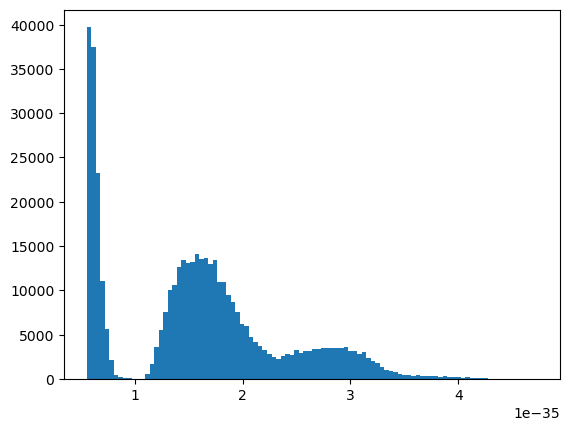

The average percentage error in CCS for identical sequences and charges is 0.6027721101804357%


In [32]:
# Load the data
mb_raw_data = pd.read_csv('../data/mann_bruker.csv', sep='\t')

# Keep only necessary columns
mb_clean_frame = mb_raw_data[['Modified sequence', 'CCS','Mass','Charge','Length']]
# Now for all the same modified sequence and charge, calculate the error in CCS
#get max value of length
max_length = mb_clean_frame['Length'].max()
print(max_length)

# Show distribution of Mass values
plt.hist(mb_clean_frame['CCS'], bins=100)
plt.show()
# Group the data by 'Modified sequence' and 'Charge'
# Group by 'Modified sequence' and 'Charge', calculate standard deviation and mean of 'CCS'
grouped = mb_clean_frame.groupby(['Modified sequence', 'Charge'])['CCS'].agg(['std', 'mean'])

grouped['CV'] = grouped['std'] / grouped['mean'] * 100

average_error_percentage = grouped['CV'].mean()

print(f"The average percentage error in CCS for identical sequences and charges is {average_error_percentage}%")



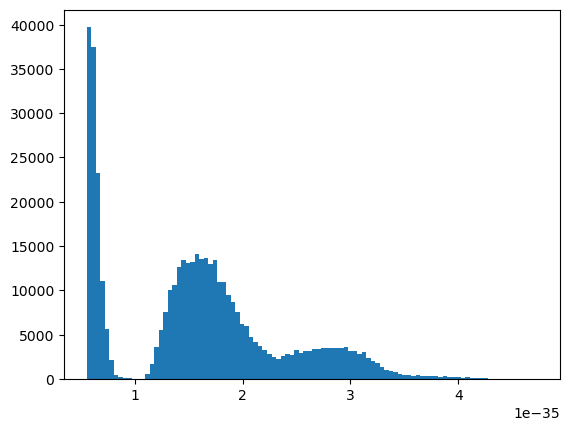

In [33]:
# Log transform CCS values
#mb_clean_frame['CCS'] = np.log(mb_clean_frame['CCS'])
# Plot the distribution of CCS values
plt.hist(mb_clean_frame['CCS'], bins=100)
plt.show()

/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_2662/2946923378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_clean_frame['CCS'] = scaler.fit_transform(mb_clean_frame['CCS'].values.reshape(-1, 1))


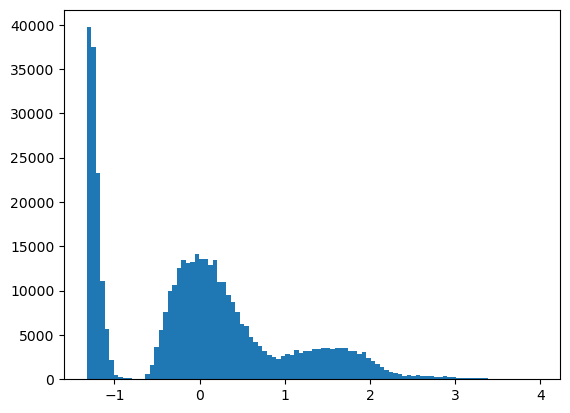

In [34]:
# Minmax scale the CCS values
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
mb_clean_frame['CCS'] = scaler.fit_transform(mb_clean_frame['CCS'].values.reshape(-1, 1))
plt.hist(mb_clean_frame['CCS'], bins=100)
plt.show()